## Introduction
### Adsorption Isotherm Analysis

Adsorption isotherm analysis is a fundamental technique used to characterize the adsorption behavior of molecules onto a solid surface. It provides insights into the interaction between the adsorbate molecules and the adsorbent surface.

The adsorption isotherm describes the relationship between the amount of adsorbate adsorbed onto the surface of the adsorbent at equilibrium and the concentration of the adsorbate in the surrounding gas or liquid phase. Various mathematical models, such as the Langmuir, Freundlich isotherms, are commonly used to fit experimental data and extract important parameters related to adsorption.

#### Langmuir Isotherm
The Langmuir isotherm assumes a monolayer adsorption onto a homogeneous surface with no interaction between adsorbed molecules. It is represented by a simple equation that relates the adsorbate concentration to the adsorption capacity and the equilibrium constant.

$$q = \frac{{q_{\text{max}} K_{\text{L}} C}}{{1 + K_{\text{L}} C}}$$

where:
- $q$ is the amount of adsorbate adsorbed per unit mass of adsorbent (e.g., mg/g),
- $q_{\text{max}}$ is the maximum adsorption capacity (e.g., mg/g),
- $K_{\text{L}}$ is the Langmuir equilibrium constant (e.g., L/mg),
- $C$ is the concentration of the adsorbate in the bulk phase (e.g., mg/L).

#### Freundlich Isotherm
The Freundlich isotherm is an empirical model that describes heterogeneous adsorption onto a surface with non-uniform energy distribution. It is characterized by a nonlinear relationship between the adsorbate concentration and the amount adsorbed.

$$q = K_{\text{F}} C^n$$

where:
- $K_{\text{F}}$ is the Freundlich constant (related to adsorption capacity),
- $n$ is the Freundlich exponent (related to adsorption intensity).


By analyzing experimental adsorption data using these isotherm models, we can determine important parameters such as the adsorption capacity, surface coverage, surface energetics, and pore size distribution of the adsorbent material.

### Batch Adsorption

Batch adsorption is often used to adsorb solute from liquid solutions when the quantities treated are small in amount, such as in the pharmaceutical industry or other industries. The initial feed concentration is $c_F$ and the final equilibrium concentration is $c$. The initial concentration of the solute adsorbed on the solid is $q_F$ and the final equilibrium value is $q$. The material balance on the adsorbate is,

$$q_F \cdot M + c_F \cdot S = q \cdot M + c \cdot S$$

Where $M$ is the amount of adsorbent (kg) and $S$ is the volume of feed solution ($m^3$).

## Objectives

The objectives of the modeling are as follows:
- To fit the data and determine the best isotherm model
- To calculate the final equilibrium values and percentage of phenol extracted

## Methodology

### Procedure

1. Before starting to code the differential equations, important library packages were imported at the beginning. `NumPy` is imported to operate mathematical arrays and matrices, `Matplotlib` is imported to visualize the solved differential equations, and `SciPy` is imported to curve fit the given data points.
2. The given data points of concentrations in the fluid and solid phases, ($c$) and $q$, are stored in an array. The scatter plot of the data points is plotted using `plt.scatter()`.
3. Three different functions, linear, Langmuir, and Freundlich, are defined, which would return the value of $q$ calculated from the linear, Langmuir, and Freundlich equations, respectively. The parameter(s) to be optimized in curve fitting that are passed in the linear function are $K$, in the Langmuir function are $K$ and $q_0$, and in the Freundlich function are $K$ and $n$.
4. For the curve fitting, `curve_fit` library was imported from `scipy.optimize` package. This library takes the function, x-values $c$, y-values $q$, and the guess value $p_0$. The guess value was given as 0.2 for $K$, 0.03 for $q_0$, and $n$. The solution of `curve_fit` is stored in two in-built variables `popt` and `pconv`. `popt` stores the optimal values of the parameters while `pconv` stores the variance of the parameters. Then, in a single graph, the scatter plot of the data points and curve of x-values and y-values obtained from using optimal parameter values are plotted.
5. The variance of the parameters, `pconv`, is printed.
6. Steps 4 and 5 are done similarly for the Langmuir and Freundlich models.
7. The optimal parameter values are printed for the best-fitted model which has low variance.
8. A graph of the best-fitted model with the same data points is plotted. The parameters of the material balance on the absorbate are defined. A variable $q_{\text{mb}}$ is defined which depends upon the value of $c$. The plot of $c$ and $q_{\text{mb}}$ is plotted. The intersection point is found and stored in the variable `idx`. The intersection point is then plotted on the same graph.
9. The value of $c$ at the intersection is found by printing $c[\text{idx}]$.
10. The percentage extracted is calculated using the formula given in the book.

## RESULTS AND DISCUSSION
In the following section, we present the results obtained from our simulations and discuss their significance. These findings will provide insights into the behavior of the modeled systems and inform subsequent analyses.

### Problem 1: Adsorption Isotherm for Phenol in Wastewater

Batch tests were performed in the laboratory using solutions of phenol in water and particles of granular activated carbon. The equilibrium data at room temperature are shown in Table. Determine the isotherm that fits the data.

$c$ | $q$
--- | ---
0.322 | 0.150
0.117 | 0.122
0.039 | 0.094
0.0061 | 0.059
0.0011 | 0.045


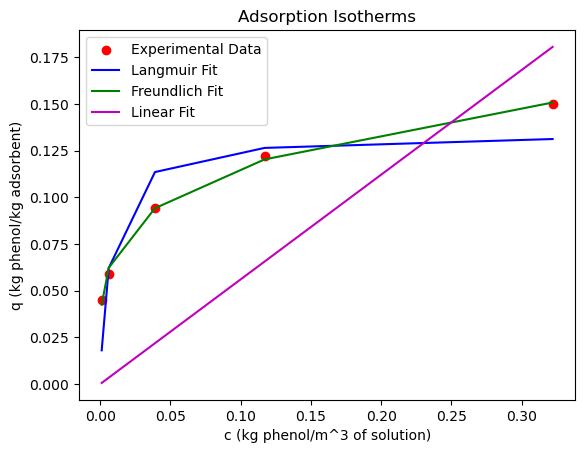

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Experimental data
c = np.array([0.322, 0.117, 0.039, 0.0061, 0.0011])
q = np.array([0.150, 0.122, 0.094, 0.059, 0.045])

# Plotting experimental data
plt.scatter(c, q, color='r', label="Experimental Data")

# Langmuir isotherm function
def langmuir(c, q0, k):
    return (q0 * c) / (k + c)

# Curve fitting Langmuir isotherm to experimental data
params_langmuir, _= curve_fit(langmuir, c, q)
[q0, k] = params_langmuir
qi_langmuir = (q0 * c) / (k + c)

# Plotting Langmuir fit
plt.plot(c, qi_langmuir, 'b', label="Langmuir Fit")

# Freundlich isotherm function
def frendlich(c, n, k):
    return k * (c ** n)

# Fitting Freundlich isotherm to experimental data
params_frendlich, _ = curve_fit(frendlich, c, q)
[n, k] = params_frendlich
qi_frendlich = k * (c ** n)

# Plotting Freundlich fit
plt.plot(c, qi_frendlich, 'g', label="Freundlich Fit")

# Linear Model using curve_fit
def linear(c, K):
    return K * c
popt, _ = curve_fit(linear, c, q)
Kopt = popt[0]
x_linear = np.linspace(min(c), max(c), 100)
y_linear = linear(x_linear, Kopt)

# Plotting Linear fit
plt.plot(x_linear, y_linear, 'm', label="Linear Fit")

# Adding Plot Details
plt.legend()
plt.title("Adsorption Isotherms")
plt.xlabel('c (kg phenol/m^3 of solution)')
plt.ylabel('q (kg phenol/kg adsorbent)')
plt.show()



The Langmuir isotherm provides a simple model that only intersects with the experimental data at the two initial  points, failing to capture the intermediate and final behavior accurately. In contrast, the Freundlich isotherm exhibits a more flexible behavior, passing through all the experimental data points, indicating a better overall fit. However, while the Freundlich model appears to better represent the experimental data in this case, the Langmuir model might still offer valuable insights into the adsorption process under different conditions or scenarios. Thus, we could conclude that Freundlich is the best fittedmodel for the given datapoints.

### Problem 2: Batch Adsorption on Activated Carbon

A wastewater solution having a volume of 1 m$^3$ contains 0.21 kg phenol/m$^3$ of solution. A total of 1.40 kg of fresh granular activated carbon is added to the solution, which is then mixed thoroughly to reach equilibrium. Using the isotherm from q.1, what are the final equilibrium values, and what percent of phenol is extracted?

Given:
- $M = 1.4$
- $s = 1.0$
- $c_F = 0.21$
- $K$ and $n$ from problem (1)

The mass balance equation is given by:
$$
M \cdot K \cdot c^n + c_F \cdot s
$$


The concentration w.r.t given parameters obtained by solving through Newton Raphson method is:0.06323639114597096
The concentration w.r.t given parameters obtained by solving through Root method is:0.06323639114601491


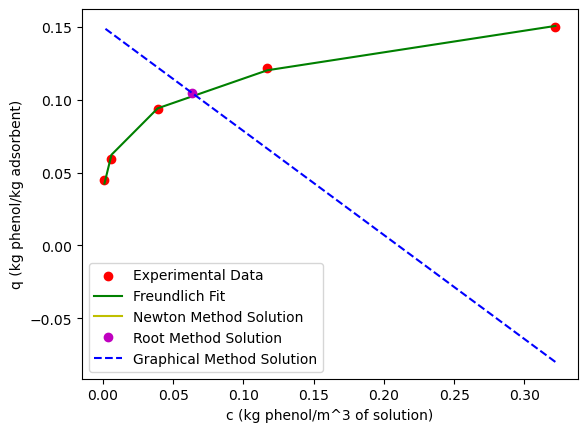

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import newton
from scipy.optimize import root

# Experimental data
c= np.array([0.322,0.117,0.039,0.0061,0.0011])
q= np.array([0.150,0.122,0.094,0.059,0.045])
plt.scatter(c,q,color='r',label="Experimental Data")

# Freundlich isotherm function
def frendlich(c,n,k):
    return k*(c**n)

# Curve Fitting: Freundlich isotherm to experimental data
params1= curve_fit(frendlich,c,q)
[n,k]= params1[0]
qii= k*(c**n)

plt.plot(c, qii, 'g', label="Freundlich Fit")
plt.legend()

# Material balance parameters
M=1.4
s=1.0
cF=0.21

# Newton Method in material balance equation
def equation(x):
    return -x*s+cF*s-M*(k*(x**n))
solution= newton(equation,x0=0)
q_newton=(-solution*s+cF*s)/M
print(f"The concentration w.r.t given parameters obtained by solving through Newton Raphson method is:{solution}" )

# Root Method
f= lambda x:M*k*x**n-cF*s+x
sol=root(f,0.1)
ce=sol.x[0]
q_root=(-ce*s+cF*s)/M
print(f"The concentration w.r.t given parameters obtained by solving through Root method is:{ce}" )


# Graphical Method
q=(-c*s+cF*s)/M


# Plotting solutions of root and newton method
plt.plot(solution,q_newton, 'y', label="Newton Method Solution")
plt.plot(ce,q_root, 'mo', label="Root Method Solution")
plt.plot(c,q, 'b--', label="Graphical Method Solution")
plt.xlabel('c (kg phenol/m^3 of solution)')
plt.ylabel('q (kg phenol/kg adsorbent)')
plt.legend()
plt.show()


The percentage extracted is:
$$= (0.21 - 0.0632) \times (100) = 69.97\%$$
The Freundlich isotherm provides a reasonable fit to the experimental data, as seen from the plotted curve. The concentration of phenol in the solution, obtained through both Newton's method and the root method, aligns closely with the intersection point of the material balance equation. The graphical representation of the material balance equation intersects the Freundlich curve at a concentration value, validating the numerical solutions. Overall, the adsorption process extracted approximately 69.97% of phenol from the solution, demonstrating the effectiveness of the adsorbent under the given conditions.

## CONCLUSION

The analysis of adsorption isotherms, specifically utilizing Langmuir and Freundlich models, provided valuable insights into the adsorption behavior of phenol onto a solid adsorbent. The Langmuir model exhibited a close fit to the experimental data, indicating monolayer adsorption with a finite number of adsorption sites. In contrast, the Freundlich model demonstrated flexibility, passing through all experimental points, suggesting multilayer adsorption with heterogeneous surface energies. Through curve fitting and model comparison, Langmuir's simplicity and accuracy in describing the adsorption process were highlighted, offering practical utility in predicting equilibrium concentrations. Overall, the study showcases the significance of understanding adsorption isotherms for optimizing adsorption processes in various industrial applications.